# **Импорт стандартных модулей. Команды import и from**

Модуль - обычный текстовый файл.

`import` создаёт пространство имён, которое содержит всё, что определено в этом модуле.

`from` позволяет импотировать конкретные функции или переменные модуля без импорта всех остальных. C `*` импортируются все функции и переменные модуля.

`as` создаёт псевдоним модуля. Можно использовать и с from.

In [ ]:
import pandas as pd
from math import ceil as c, pi
from math import * # напрямую импортирует все функции и переменные модуля.

# **Импорт собственных модулей**

Если в одном каталоге с Python-файлом (или в стандартных папках поиска модулей), с которым идёт работа, лежит другой Python-файл, то его можно импортировать через import. Тогда все глобальные функции и глобальные переменные из второго файла будут доступны в первом.

Если во втором файле (модуле) буде импортирован какой-либо другой модуль (например, math), то он будет доступен в том файле, в который собственный модуль импортирован (к примеру, вызвпть любую функцию из модуля math можно будет, указав mymodule.math...).

Если модуль назодится в подкаталоге, то его нужно будет явно указать. Если в рабочей папке есть дополнительная папка folder, то импортировать модуль нужно будет командой `import folder.mymodule`.

Если в подкаталоге находится оригинальный рабочий файл, а модуль - в рабочем каталоге, то можно прописывать `import mymodule` без дополнительных указателей.

При импорте модуля интерпретатор его один раз выполняет. Если в подключаемых модулей есть какие-то вызовы функций или выводы, они будут исполнены.

При перекрёстном импорте (если в оригинальном файле прописана конструкция `import mymodule`, а в модуле - `import mainfile`), сначала исполнится оригинальный файл (так как он импортирован в модуле), потом модуль (так как он импортирован в оригинальном файле), потом снова оригинальный файл. Рекурсии не происходит, так как *модуль при импорте выполняется только один раз*.

In [ ]:
# посмотреть пути, в котором интерпретатор ищет модули, можно следующим образом
import pprint
import sys

pprint.pprint(sys.path)

# добавить какой-то путь, в котором следует искать модули, можно следующим образом
sys.path.append(r'явно указанный путь к файлу')

# при оригинальном выполнении файла (не через import), его внутреннее имя - __main__
# eсли нужно, чтобы программа что-то исполняла именно при оригинальном выполнении, это можно сделать следующим образом
if __name__ == '__main__':
    print('hello world!')
# этот блок кода не исполнится при импорте модуля, так как при импорте внутреннее имя меняется на __имя файла__

# если нужно при инициализации исполнить модуль больше, чем один раз, то для этого используется библиотека importlib
import sys # любой условный модуль
import importlib

importlib.reload(sys)

# **Установка внешних модулей (пакетов)**

`pip list` в командной строке позволяет увидеть список установленных модулей/пакетов и их версии.

`pip install имя модуля` установит модуль/пакет.

`pip install имя модуля==версия пакета` установит модуль/пакет конкретной версии.

Все модули/пакеты можно найти на сайте `pypi.org`.

Модули/пакеты устанавливаются для текущего интерпретатора, так как некоторые пакеты привязаны к определённым версиям Python. Если удалить/переустановить интерпретатор, или переключиться на другой, то все модули/пакеты удалятся или не подгрузятся соответственно.

Модули/пакеты можно устанавливать списком. Нужен текстовый файл с указанием модулей и их версий (можно выгрузить при помощи команды `pip freeze > requirements.txt` в случае, к примеру, переноса на новую версию). Команда `pip install -r название текстового файла`.

# **Пакеты (package)**

Пакет (package) - специальным образом организованный подкаталог с набором модулей, как правило, решающих сходные задачи.

Создать пакет можно, создав в какой-либо папке файл `__init__.py`. Для корректного создания пакета все связанные иодули должны быть в кодировке utf-8.

Структура пакета примерно такая:

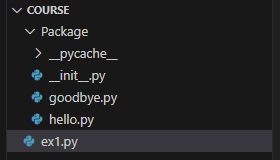

В данном случае при инициализации `import Package` автоматически исполнится файл `__init__.py`. В нём должно быть указано, что импортировать при импорте всего пакета.

Структура файла `__init__.py` должна быть примерно такой:

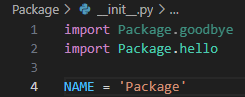

Если из модулей импортируются отдельные функции, то это можно сделать при помощи относительного импорта. Точка в данном случае означает, что файл берётся из текущего каталога (две точки - что из родительского, из папки уровнем выше). Структура файла `__init__.py` должна быть примерно следующей:

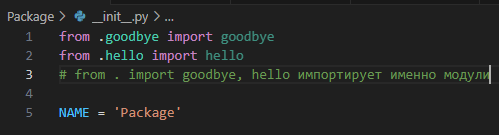

Внутри пакетов иногда имеет смысл импортировать модули через звёздочку. В таком случае имеет смысл прописывать в модуле функции, которые можно импортировать через `*`, при помощи переменной `__all__`.

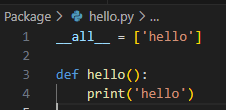

Можно создавать вложенные пакеты (подкаталог в подкаталоге).

# **Работа с файлами**

Открыть файл позволяет функция `open`. Синтаксис:

`open(file[, mode='r', encoding=None, ...])`

**Примечание**: в квадратных скобках не список, а дополнительные параметры.

Параметры:
* `file` - путь к файлу.
* `mode` - режим чтения.
* `encoding` - кодировка.

Если файл лежит в рабочем каталоге, можно прописать просто относительный путь - 'file.txt'. Если нет, то нужно указать полный, желательно с такими слешами - '/'. Если файл не будет найден, возвратится ошибка.

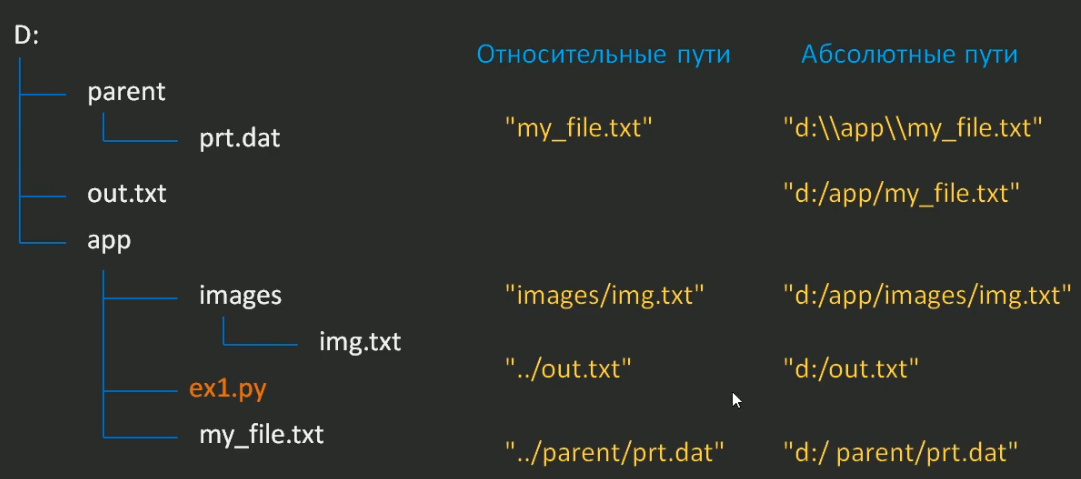

Метод `read()` позволяет вывести содержимое файла. В скобках можно указать количество символов, которое должно быть возвращено. В файлах с кодировкой utf-8 иногда может присутствовать невидимый символ #FEFF, поэтому может возвращаться на один символ меньше. В конце текста есть невидимый символ EOF - end of file.

После указания количества символов, которое должно быть считано при функции `read()`, зафиксируется файловая позиция. Очень условно её можно представить как некий итератор, остановившийся на конкретном месте:

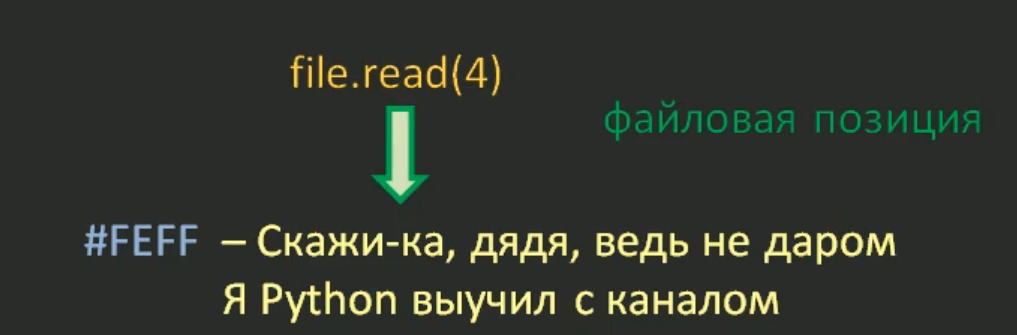

Файловой позицией можно управлять положением файловой позиции при помощи метода seek(). Синтаксис:

`file.seek(offset[, from_what])`

Функция `tell()` возвратит файловую позицию в байтах. Русский символ занимает два байта, поэтому возвращённая позиция не будет совпадать с порядковым номером символа.

Функция `readline()` возвратит первую строку. Переносом строки является символ `\n`. Строка по умолчанию отражается с переносом строки, если его нужно убрать, можно добавить в print параметр `end=''`. Так же как и функция `read()`, функция `readline()` фиксирует файловую позицию на конце строки, и следующий вызов `readline()` возвратит следующую строку.

Функция `readlines()` возвратит список из всех строк. Его следует использовать с осторожностью: если файл большой, то может возникнуть нехватка пямяти.

После окончания работы с файлом, его ОБЯЗАТЕЛЬНО следует закрыть при помощи функции `close()`. Она уберёт файл из памяти, также не будет проблем с данными при записи их в файл.

Флаг `closed` выводит True-False в зависимости от того, закрыт или открыт файл.

In [ ]:
# самый базовый вариант открытия файла на чтение
file = open('file.txt')

# открытие файла с указанием кодировки
file = open('file.txt', encoding='utf-8')
print (file.read()) # выведет содержимое файла
print (file.read(4)) # выведет первые четыре символа (или меньше, если в начале есть один невидимый символ)
print (file.read(4)) # выведет СЛЕДУЮЩИЕ четыре символа
file.seek(0) # переместит файловую позицию в начале
file.tell() # возвратит файловую позицию в байтах
file.close() # закроет файл
file.closed # возвратит True, если файл закрыт, или False, если файл открыт

# **Обработка исключения FileNotFoundError и менеджер контекста**

При работе с файлами важно уметь обрабатывать исключение FileNotFoundError, чтобы программа продолжала работать, даже если файл не будет найден (перемещён, удалён и т.п).

Для обработки ошибок-исключений есть группа операторов `try` / `exept` / `else` / `finally`.

Синтаксис:

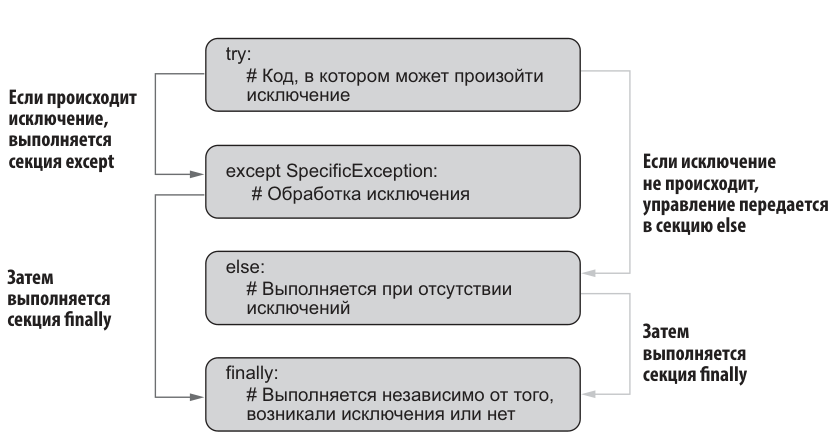

В качестве замены блока try-finally (для закрытия файла, как в примере ниже) можно использовать файловый менеджер контекста - оператор `with`. Он закрывает файл вне зависимости от ошибок и чего-либо.

In [ ]:
# пример обработки исключения FileNotFoundError
try:
    file=open('file.txt', encoding='utf-8')
    try:
        print(file.readlines()) # даже если не считаются строки, файл закроется
    finally: # выполнится В ЛЮБОМ СЛУЧАЕ, вне зависимости, возникнет или не возникнет ошибка в предшествующем блоке try
        file.close()
except FileNotFoundError:
    print('Такого файла не существует!') # Такого файла не существует!
except: # отловит все другие исключения, если они возникнут
    print('Ошибка при работе с файлом!')

# пример использования менеджера контекста
try:
    with open('file.txt', encoding='utf-8') as file: # закроет файл после выполнения блока кода вне зависимости от ошибок
        print(file.readlines())
except FileNotFoundError:
    print('Такого файла не существует!') # Такого файла не существует!
except:
    print('Ошибка при работе с файлом!')